# EDA ML OPS

- **Informe EDA:**
  - NO utilizar una librería automatica para EDA
  - Presentar todos los análisis esperados en un EDA.
  - Hacer análisis profundo de todos los elementos clave    
  - Hacer explicitos los criterios de decisión     
  - Apoyar el analisis en las gráficas es pertinente    
  - chequeo de nulos    
  - valores duplicados    
  - valores faltantes    
  - tipos de datos    
  - análisis estadístico de datos    
  - análisis de correlaciones bi y multivariado    + drop columnas que no se van a usar

    Explora las relaciones entre variables, busca outliers y anomalías, y realiza un análisis exploratorio sin el uso de librerías automáticas.

    \- análisis de correlaciones bi y multivariado    + drop columnas que no se van a usar


c

* Rangos(min, max), variabilidad(dispercion o variacion), estadistica(tecnicas estadisticas para analizar los datos) , distribucion(como se distribuyen los datos en un conjunto) generalidades dataset,

* **tipos de datos:**

 * visualizar, interactuar 

* **Numericos**  :discretos o continuos

* **Categoricos**:    nominale(sin orden o medido genero por ejemplo)    

* **Binarios**

 * **Ordinales**



* **Descripcion estadistica descriptiva**

* **MEDIA**

* **Mediana** (ordinales o discretos) (primero ordenar los datos)     

* **Desviacion estandar**

* (cualquier dato numerico, mas bajo es mas agrupado)    



* **rango intercuartiles:**

 * (diferencia entre percentil 75 y percentil 25) 

* **Visualizar**

* Histograma

* box plot 

* Analizis vibariado o multivariadoindice de correlacion 


# EDA 

####  **Importamos las librerías que vamos a usar**


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import inspect
import ast  # AST (Abstract Syntax Trees) se utiliza para interpretar expresiones Python
import gzip
import json  # JSON se utiliza para trabajar con datos en formato JSON
import os  # OS proporciona funciones para interactuar con el sistema operativo
import warnings  # Warnings se utiliza para gestionar advertencias y filtrarlas si es necesario
import seaborn as sns


# Suprimir todos los warnings
warnings.filterwarnings("ignore")

import data_utils
from data_utils import data_type_check, data_type_check_EDA, descomprimir_archivos_gz


#Cargar los Dataframe desde los archivos parquet
df_games_limpio =   pd.read_parquet('../0 Dataset/steam_games_LISTO.parquet')


# 1_ **`steam_games`**



#### 📦 **Extraccion** de los datos y primera exploración 


- **Descomprimimos el archivo gz** , tomamos los datos del archivo JSON, los transformamos en un DataFrame y realizamos una primera observación de su contenido.

Archivo descomprimido: ../0 Dataset/steam_games.json

 Resumen del DataFrame 'df_steam_games': 

Dimensiones:  (120445, 13)
         columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0      publisher     24083       20.00  96362    80.00    object
1         genres     28852       23.95  91593    76.05    object
2       app_name     32133       26.68  88312    73.32    object
3          title     30085       24.98  90360    75.02    object
4            url     32135       26.68  88310    73.32    object
5   release_date     30068       24.96  90377    75.04    object
6           tags     31972       26.54  88473    73.46    object
7    reviews_url     32133       26.68  88312    73.32    object
8          specs     31465       26.12  88980    73.88    object
9          price     30758       25.54  89687    74.46    object
10  early_access     32135       26.68  88310    73.32    object
11            id     32133       26.68  88312    73.32    object
12     developer     28836     

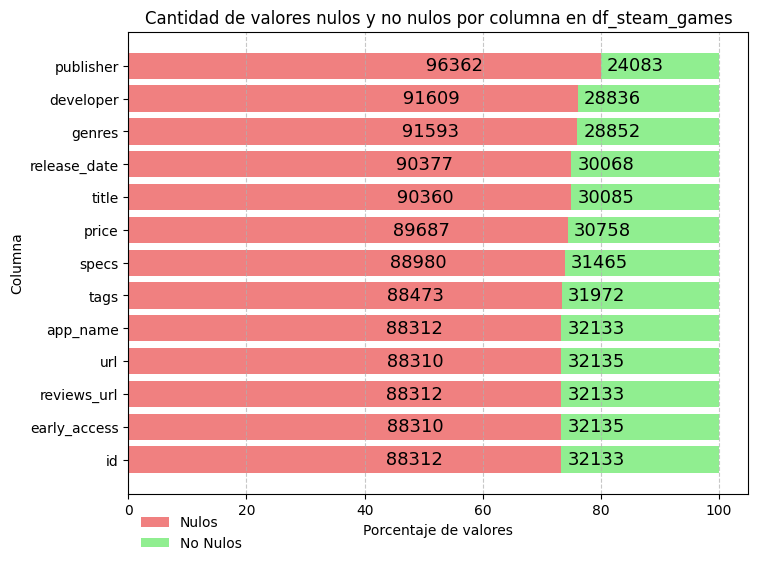

In [2]:
# Ejemplo de uso con una lista de archivos gz
archivo_gz_a_descomprimir = ['../0 Dataset/steam_games.json.gz']
carpeta_destino = '../0 Dataset/'

descomprimir_archivos_gz(archivo_gz_a_descomprimir, carpeta_destino)

#Creamos una lista vacía llamada "rows" donde almacenaremos los datos del archivo JSON.

row = []
with open("../0 Dataset/steam_games.json", "r", encoding="utf-8") as archivo:
    for linea in archivo:
        try:
            objeto_json = json.loads(linea)
            row.append(objeto_json)
        except json.JSONDecodeError:
            print(f"Error de formato JSON en la línea: {linea}")

#Convertir la lista de objetos JSON en un DataFrame
df_steam_games = pd.DataFrame(row)
#Hacemos una copia del dataset sucio para explorarlo en el EDA
df_steam_games_sucio = pd.DataFrame(row)
# Llamamos a una funcion personalizada para analizar
data_type_check_EDA(df_steam_games)



#### Usando la funcion personalizada `data_type_check` invocada desde `data_utils.py` podemos observar:
- Variables categóricas
- Variables numéricas
- Dimensiones del dataframe
- Verifcacion de nulos: `isnull().sum())`
- Tipos de datos: `.dtype`
- Dimensiones del dataframe `.shape`

#### En este punto procedemos a limpiar nuestros datos LINK A ETL

#### 🔁 **TRANSFORM**
  * ✅ Columnas irrelevantes (que no nos sirven para el problema que queremos resolver)
  * ✅ Datos faltantes o nulos: **.dropna**
  * ✅ Registros o filas repetidas: **drop_duplicates**
  * ✅ Variables categoricas: Errores tipográficos

- 🗑️ Eliminamos columnas que no vamos a usar: publisher, title, url, early_access, reviews_url, specs.

🔄 `ID:`
- Eliminamos nulos y repetidos

`release_date`:

- Extraigo el año y cambio el nombre de la columna a 'release_year'
- Reemplazamos los datos sin fecha por
- Cambiamos tipo de dato a int.

`price`:

- Asignmos valores correspondientes a precios con textos adicional.
- Rellenamos missing values buscando en tags si el juego es gratis.
- Rellena los valores nulos resultantes con -1.
- Convierte la columna 'price' a tipo float.

`genres:`

- Rellenamos la informacion faltante de genres, con los genres disponibles en la columna tags.

🔄 `app_name` en string

🔄 `tags` en string

🗃️ `Genres `: Rellenamos la informacion faltante de genres en cada juego, con los genres disponibles en la columna tag

### Asi se ve nuestro dataset luego de la limpieza


 Resumen del DataFrame 'df_games_limpio': 

Dimensiones:  (31190, 6)
        columna  no_nulos  %_no_nulos  nulos  %_nulos       tipo_dato
0        genres     31190       100.0      0      0.0          object
1      app_name     31189       100.0      1      0.0  string[python]
2         price     31190       100.0      0      0.0           int32
3       user_id     31190       100.0      0      0.0          object
4     developer     31190       100.0      0      0.0  string[python]
5  release_year     31190       100.0      0      0.0          object


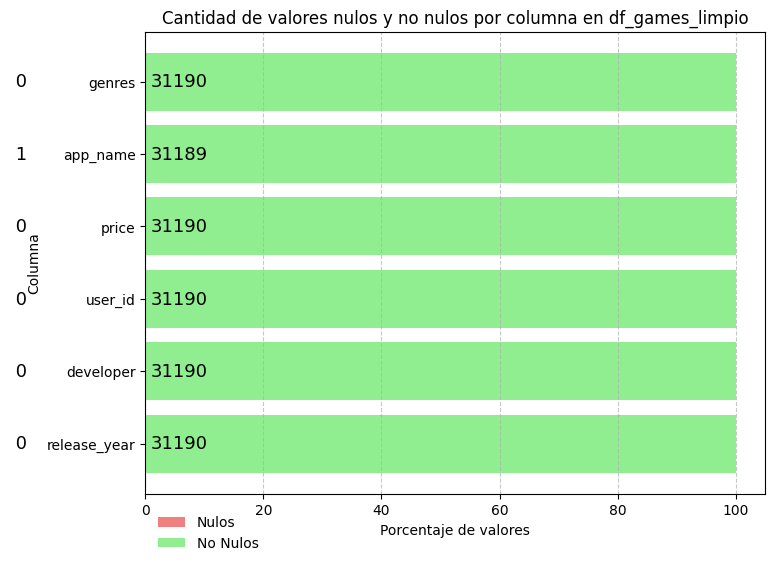

In [3]:
data_type_check_EDA(df_games_limpio)

## GENRES
## RELEASE_YEAR
## APP_NAME
## PRICE
## USER_ID
## DEVELOPER

**Tipos de variables** MOSTRAR COMPARATIVA?

In [5]:
# 1. Tipos de Variables
tipos_df_games = df_steam_games.dtypes
print("\nTipos de Variables en df_games:")
print(tipos_df_games)


Tipos de Variables en df_games:
publisher       object
genres          object
app_name        object
title           object
url             object
release_date    object
tags            object
reviews_url     object
specs           object
price           object
early_access    object
id              object
developer       object
dtype: object


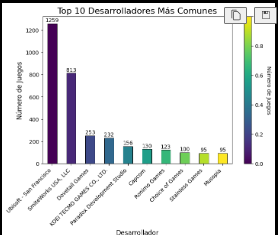

## Analisis Multivariado


## Correlacion de variables

### Análisis de Correlación de Variables:

Correlación de Variables:
Calcularemos y visualizaremos la matriz de correlación entre las variables numéricas en df_games

- **Informe EDA:**
  - NO utilizar una librería automatica para EDA
  - Presentar todos los análisis esperados en un EDA.
  - Hacer análisis profundo de todos los elementos clave    
  - Hacer explicitos los criterios de decisión     
  - Apoyar el analisis en las gráficas es pertinente    
  - chequeo de nulos    
  - valores duplicados    
  - valores faltantes    
  - tipos de datos    
  - análisis estadístico de datos    
  - análisis de correlaciones bi y multivariado    + drop columnas que no se van a usar

    Explora las relaciones entre variables, busca outliers y anomalías, y realiza un análisis exploratorio sin el uso de librerías automáticas.

    \- análisis de correlaciones bi y multivariado    + drop columnas que no se van a usar


## Analisis estadistico de datos